In [1]:
addprocs(2)

2-element Array{Int64,1}:
 2
 3

In [2]:
@everywhere push!(LOAD_PATH, "..")

In [3]:
using PyPlot
using AffineTransforms

In [40]:
@everywhere reload("Ev3")
@everywhere import Ev3

In [41]:
# @everywhere hostnames = ["192.168.1.27", "192.168.1.25"]
@everywhere hostnames = ["18.111.105.87", "18.111.107.247"]
@everywhere initial_poses = [AffineTransforms.tformeye(2), 
    AffineTransforms.tformtranslate([-1.5/3, -7.5/3]) *
    AffineTransforms.tformrotate(-pi/2)]

In [42]:
maps = @sync @parallel (vcat) for i = 1:1
    robot = Ev3.default_remote_robot(hostnames[i])
    Ev3.run_mapping(robot, timeout=30, initial_pose=initial_poses[i])
end
nothing # suppress printout

	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = -0.017453292519945762
	From worker 2:	angle_change = -0.017453292519945762
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.017453292519945762
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = -0.017453292519945762
	From worker 2:	angle_change = 0.017453292519945762
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.017453292519945762
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = -0.017453292519945762
	From worker 2:	angle_change = 0.0
	From worker 2:	angle_change = 0.0
	F

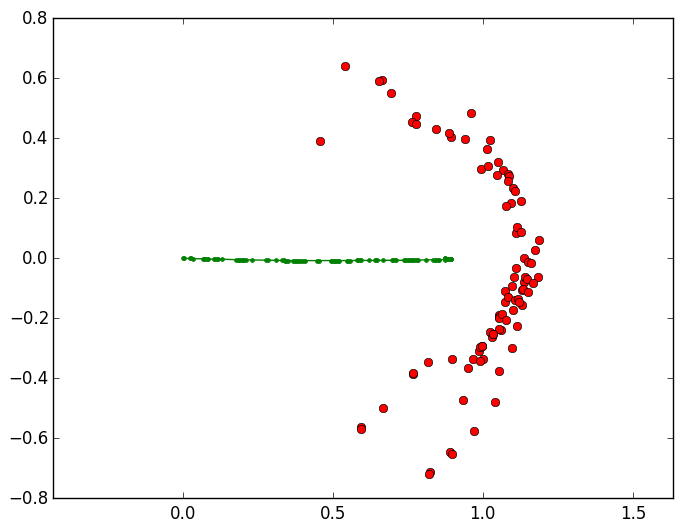

In [44]:
function draw(m::Ev3.Map)
    plot([x[1] for x in m.points], [x[2] for x in m.points], "ro")
    plot([x.offset[1] for x in m.path], [x.offset[2] for x in m.path], "g.-")
    axis("equal")
end

maps = vcat(maps) # make sure maps is a Vector, even if there's only 1
cla()
hold(true)
for m in maps
    draw(m)
end